# Introducrtion to Machine Learning: Assignment #3
## Submission date: 09\07\2024, 23:55.
### Topics:
- Multiclass Classification
- PAC, VCdim
- Bias vs Variance
- Cross validation
- Linear Regression
- Decision Trees

Submitted by:

 **Bashar Beshoti + 207370248

 **Ayal Kaabia + 322784760

**Assignment Instruction:**

· Submissions in pairs only.

· Try to keep the code as clean, concise, and short as possible

· If you wish to work in your IDE, you can, but you **must**,  insert the script back to the matching cells of the notebook and run the code. <br/>Only the notebook will be submitted in moodle (in `.ipynb` format).

· <font color='red'>Please write your answers to question in red</font>.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output). <br/>

**Important:** Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to grade 0 and disciplinary actions.


## Question 1 - Multiclass SVM

You will implement and compare different multiclass methods in both separable and non separable cases.

In [ ]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC


As seen in tutorials, One vs One is usually a better choice than other methods, even SKlearn uses it! <br/>
You are given a partial implementation of OvO classifier and need to complete it. Specifically:<br/>
- ```__init__(self, n_classes=2, C=1.0)``` - Init $\binom{n}{2}$ estimators, one for each pair of classes.

- ```fit(self, X, y)``` - given data and labels learns the classifiers using linear SVM. <br/>

- ```predict(self, X)``` - as learned in lectures, prediction for sample will be the majority class got most votes from all the classifiers.  Therefore, $\forall i<j$ predict who is the winner for X in the estimator $(i,j)$ and update the bins accordinly.

In [ ]:
from collections import defaultdict

class OneVsOneClassifier:
    def __init__(self, n_classes=2, C=1.0):
        self.n_classes = n_classes
        self.C = C
        self.estimators = defaultdict(None)
        # Initialize the estimators dictionary with pairs of classes
        for i in range(n_classes):
            for j in range(i + 1, n_classes):
                self.estimators[(i, j)] = SVC(C=C, kernel='linear')

    def fit(self, X, y):
        for i in range(self.n_classes):
            for j in range(i + 1,self.n_classes):
                # Add code here
                # Extract samples belonging to class i or j
                mask = (y == i) | (y == j)
                temp_X = X[mask]
                temp_y = y[mask]

                # Mappping class
                temp_y = np.where(temp_y == i, 0, 1)
                self.estimators[(i,j)].fit(temp_X, temp_y)

    def predict(self, X):
        scores = np.zeros((len(X),self.n_classes))
        for i in range(self.n_classes):
            for j in range(i + 1, self.n_classes):
                # Add code here
                # Get binary predictions from the classifier
                pred = self.estimators[(i, j)].predict(X)

                 # Mappping Predictions
                for k, p in enumerate(pred):
                    if p == 0:
                        scores[k, i] += 1
                    else:
                        scores[k, j] += 1

        return np.argmax(scores, axis=1)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

The data

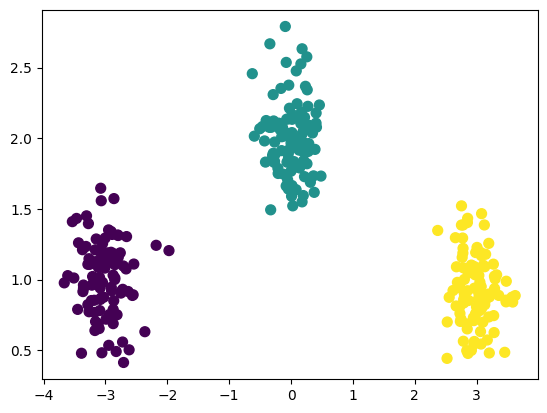

In [ ]:
from sklearn.datasets import make_blobs

np.random.seed(2)
X, y = make_blobs(n_samples=300,cluster_std=.25, centers=np.array([(-3,1),(0,2),(3,1)]))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

This will test the classifier we just built by plotting confusion matrix and draw the decision boundaries. <br/>
Does the value of C matter? <br/>

<font color='red'>The value of C does not matter much since The confusion matrix showing perfect classification with no errors (all entries on the diagonal and zero elsewhere) suggests that the classifier is perfectly fitting the training data, regardless of the value of C. and this is probably because The dataset is too simple and well-separated(looking at the plotted data its obvious to see that), making it easy for the classifier to separate the classes perfectly.
</font>

array([[100,   0,   0],
       [  0, 100,   0],
       [  0,   0, 100]])

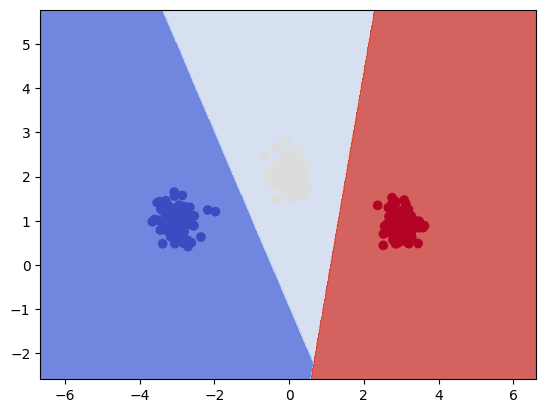

In [ ]:
from sklearn import metrics
clf_onevsall = OneVsOneClassifier(n_classes=3, C=2)
clf_onevsall.fit(X,y)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = min(X[:,0])-3,max(X[:,0])+3
y_min, y_max = min(X[:,1])-3,max(X[:,1])+3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
mesh_input = np.c_[xx.ravel(), yy.ravel()]

Z = clf_onevsall.predict(mesh_input)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

metrics.confusion_matrix(y, clf_onevsall.predict(X))

Generate another data



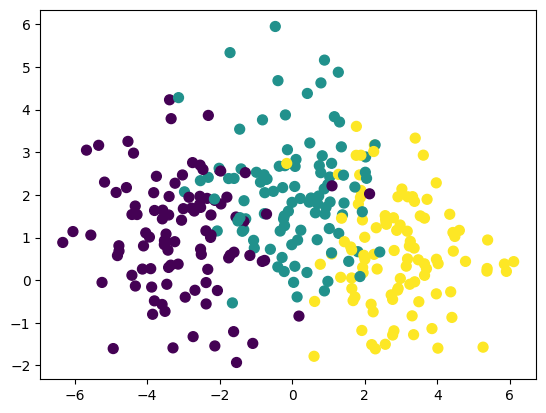

In [ ]:
np.random.seed(2)
X, y = make_blobs(n_samples=300,cluster_std=1.25, centers=np.array([(-3,1),(0,2),(3,1)]))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

Look at the train vs test for different values of C. <br/> Justify the plot, by checking what happens as $C\rightarrow 0$, $C\rightarrow \infty$ and mid value C.<br/>
<font color='red'>Write here your answer and explain</font>

<font color='red'>
1)Low C Values ( close to 0.001):
<font color='red'>
a)Training Accuracy: At very low values of C, the training accuracy is relatively high but not at its peak. This suggests that the model has a simpler decision boundary that doesn't overfit the training data.
b)Test Accuracy: The test accuracy is slightly lower than the training accuracy, indicating a small amount of underfitting. The model is not perfectly capturing the complexities of the data but is generalizing reasonably well.
<font color='red'>

2)Medium C Values (e.g., 0.5):
a)Training Accuracy: As C increases, the training accuracy decreases slightly. This suggests that the decision boundary is becoming more complex and is trying to fit the training data better.
b)Test Accuracy: The test accuracy also decreases, indicating that the model might be starting to overfit the training data, leading to poorer generalization on the test set.
</font>

<font color='red'>
3)High C Values (e.g., 1.0):
Training Accuracy: The training accuracy remains relatively stable and slightly lower than the initial value, indicating that the model is fitting the training data quite well.
Test Accuracy: The test accuracy does not improve and stays lower, which might suggest that the model has reached a point where increasing C further does not lead to better generalization but instead maintains a level of overfitting.
</font>


100%|██████████| 4/4 [00:00<00:00, 82.10it/s]


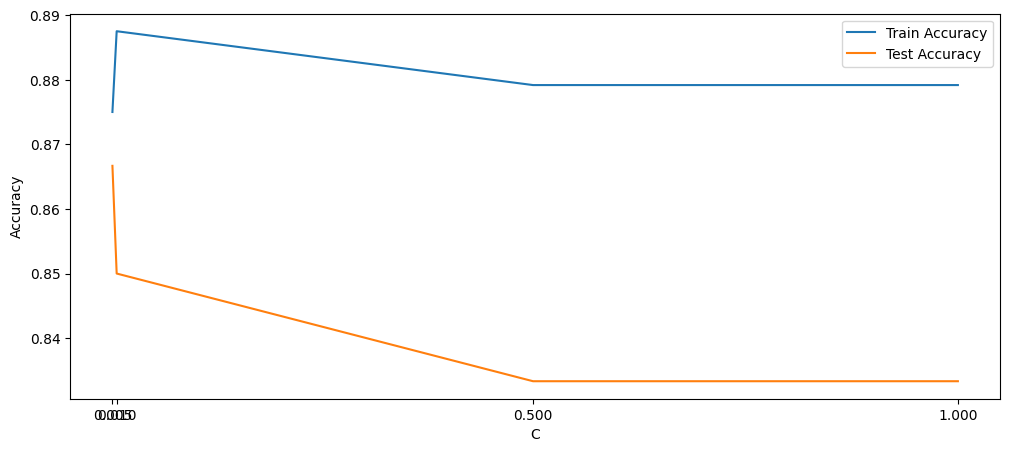

In [ ]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of C values
C_values = [5e-3, 1e-2, 0.5, 1]

train_accuracies = []
test_accuracies = []

for C in tqdm(C_values):
    # Create a new OneVsOneClassifier instance
    clf_onevsall = OneVsOneClassifier(n_classes=3, C=C)

    # Fit the classifier on the training data
    clf_onevsall.fit(X_train, y_train)

    # Calculate the train and test accuracies
    train_accuracy = clf_onevsall.score(X_train, y_train)
    test_accuracy = clf_onevsall.score(X_test, y_test)

    # Append the accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the train and test accuracies as a function of C

plt.figure(figsize=(12,5))
plt.plot(C_values, train_accuracies, label="Train Accuracy")
plt.plot(C_values, test_accuracies, label="Test Accuracy")
plt.xlabel("C")
plt.xticks(C_values)
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Now, you will experience little bit from softmax. It uses neural networks, but you dont have to understand it. The importand part is the preidction, which is obtained by:
```
def forward(self, x):
        out = self.linear(x)
        return torch.softmax(out, dim=1)
```
Note that this is exactly that you saw - linear score $s_j$ and then applying softmax.

The best results are obtained using 300 epochs (iterations) and in each iteration the batch size is the entire data. <br/>
1. What happens as you use 100,600 epcohs compared to 300? why is that?
2. Use 300 epochs with batch size 50 vs the entire data. How does the batch size affect the convergence of the problem?

<font color='red'>Write here your answers and explain them</font>

<font color='red'>
1) When you increase the number of epochs from 300 to 100,600, the model gets more opportunities to adjust its weights and biases to better fit the training data. Here's what i noticed:

Improvement in Accuracy: As i noticed, the accuracy improved from 0.8 to 0.83. This is because with more epochs, the model has more iterations to learn from the data, reducing the training loss and potentially improving performance on the validation set.
Change in Confusion Matrix: The confusion matrix showed changes, indicating that the model's predictions for some classes have improved while others might not have improved as much.
2) when we used 300 epochs with batch size of 50 instead of what was before (len(X_train) // 3 = 80) i noticed that the accuracy dropped from 0.8 to 0.7833 using softmax and if we use a batch size of the entire data then we get accuracy of 0.8167 which is much better than 0.7833(lower training accuracy might mean that it has better generalization).
Convergence Speed: Smaller batch sizes like 50 allow for more frequent updates to the model weights, which can lead to faster convergence. However, these updates can be noisy due to the limited amount of data seen in each batch.
Meanwhile Using the entire dataset as a batch means that each epoch performs one update. This can lead to slower convergence as updates are less frequent.
 which led me to this conclusion:
Batch size affects the convergence and generalization of the model. A batch size of 50 may lead to faster convergence and better generalization but with less stability, whereas using the entire dataset provides stable updates but slower convergence and potentially worse generalization.
</font>

In [ ]:
num_epochs = 300
batch_size = len(X_train) // 3
print(f"Training size is {X_train} samples and batch size is {batch_size}")

Training size is [[ 4.40560358e+00 -8.72299757e-01]
 [ 1.63979804e+00  5.26805585e-02]
 [-4.77652153e+00  8.08131005e-01]
 [ 3.47900558e+00  4.78757314e-01]
 [ 3.97435007e+00  2.28324744e+00]
 [-7.14227010e-01  2.36554008e+00]
 [ 1.81396237e+00  6.68840150e-01]
 [-4.09763487e+00  8.04457287e-01]
 [ 9.82682587e-01  2.24271087e+00]
 [ 3.24532862e+00 -9.48704625e-02]
 [-3.39188525e+00  1.96376467e+00]
 [ 9.34498677e-01  1.70887875e+00]
 [-5.24179448e+00 -5.21842071e-02]
 [-4.85308185e+00  2.05788986e+00]
 [ 1.28523112e+00  1.09765034e+00]
 [ 1.09968175e+00  2.21357665e+00]
 [ 3.37904304e+00 -3.73435559e-02]
 [ 1.97637600e+00  5.84200919e-01]
 [-3.40631204e+00  2.99706867e-01]
 [ 1.93536337e+00  1.60521495e+00]
 [ 2.80698755e+00 -1.18661100e+00]
 [ 1.56056287e+00  4.42841809e-01]
 [-1.54809814e+00  1.48259756e+00]
 [ 1.64181481e+00  7.11353128e-01]
 [ 1.16485920e+00  3.83541517e+00]
 [-3.57750669e+00  1.43861062e+00]
 [ 8.26580210e-02  2.66944794e+00]
 [ 3.64865616e+00  3.83756361e-01]
 [-

In [ ]:
#@title This will train the model using softmax

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Define the simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN, self).__init__()
        self.linear1 = nn.Linear(input_size, output_size)
        self.linear1.weight.data.fill_(1)
        self.linear1.bias.data.fill_(1)

    def forward(self, x):
        out = self.linear1(x)
        return torch.softmax(out, dim=1)

# Set hyperparameters
input_size = X_train_tensor.shape[1]
output_size = len(torch.unique(y_train_tensor))
learning_rate = 0.01

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Instantiate the model and define the optimizer
model = SimpleNN(input_size, output_size)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode

    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear gradients

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    #if (epoch + 1) % 10 == 0:
    #    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on test data
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

    accuracy = correct / total
    print(f'Accuracy on test set: {accuracy:.4f}')

Accuracy on test set: 0.8000


array([[94,  4,  2],
       [19, 69, 12],
       [ 0,  9, 91]])

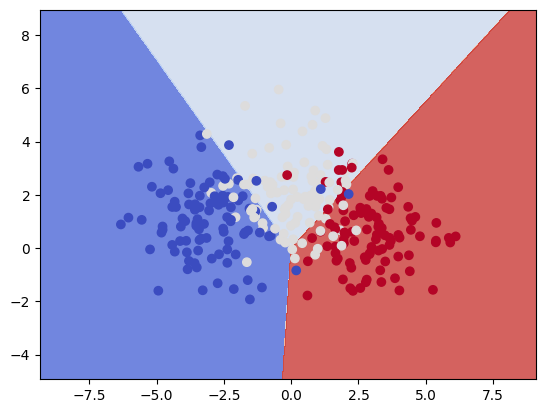

In [ ]:
#@title This will plot the boundaries of the model

def predict(data):
    outputs = model(torch.tensor(data, dtype=torch.float32))
    _, predicted = torch.max(outputs, 1)
    return predicted

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = min(X[:,0])-3,max(X[:,0])+3
y_min, y_max = min(X[:,1])-3,max(X[:,1])+3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
mesh_input = np.c_[xx.ravel(), yy.ravel()]

Z = predict(mesh_input)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

metrics.confusion_matrix(y, predict(X))

## Question 2 - Linear Regression
You are requested by the Charles Darvin himself to predict the age of abalone from physical measurements.
The dataset consists of 7 continious features that he has collected for you.

In [ ]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

We define the following:
-	X, 2d matrix from size n x d which represents the training samples.
-	y, array from size n which represents the target value for the corresponding sample.

Implement the function Linreg_sol(X,y) which outputs the closed form solution for linear regression on X,y. <br/>
Don't use pinv

In [ ]:
def Linreg_sol(X, y):
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    X_multi = np.dot(X.T, X)
    X_inverse_Y = np.dot(X.T, y)
    coeff = np.linalg.solve(X_multi, X_inverse_Y)
    return coeff


Load data from https://sharon.srworkspace.com/ml/datasets/hw3/abalone.csv

In [ ]:
# Implement here
url = 'https://sharon.srworkspace.com/ml/datasets/hw3/abalone.csv'
df = pd.read_csv(url,header = None)
print(df.head())

       0      1      2       3       4       5      6   7
0  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150  15
1  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
2  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
3  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
4  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7


Your tasks are:
- Convert to numpy
- Preproccess the data
- Find the weight vector and the bias

In [ ]:
from sklearn.preprocessing import StandardScaler

# Implement here
# 1. Convert to NumPy arrays
data = df.to_numpy()

# 2. Preprocess the data
X = data[:, :-1]
y = data[:, -1]
# Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Find the weight vector and the bias
w = Linreg_sol(X_scaled, y)

# Suppose w is the solution
print(f'The linear line is {w[1]:.2f}x1+{w[2]:.2f}x2+{w[3]:.2f}x3+{w[4]:.2f}x4+{w[5]:.2f}x5+{w[6]:.2f}x6+{w[7]:.2f}x7+{w[0]:.2f}=0')

The linear line is -0.19x1+1.33x2+0.49x3+4.53x4+-4.49x5+-1.08x6+1.19x7+9.93=0


Now, implement 'Linreg_sol_via_GD' which implement gradient descent on the linear regression problem. The stopping criterion should be based only by the iterations number recived as parameter

In [ ]:
# https://www.youtube.com/watch?v=4061WI4BEfY a good guide we used for implementation

def Linreg_sol_via_GD(X, y, lr, iter_number):
    # Number of training examples and number of features
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    n, d = X.shape[:2]
    # Initialize weights to ones
    w = np.ones(d)

    for _ in range(iter_number):
        # Compute the predictions
        y_pred = np.dot(X , w)
        temp = y_pred - y
        # Compute the gradient
        gradient = (1/n) * np.dot(X.T , temp)

        # Update the weights
        w -= lr * gradient

    return w

The following code measures the number of iterations as a function of the error gap between the returned weights and the correct solution. <br/>
Conclude the complexity formula required - How many iterations do we need as a function of the error, $\varepsilon$? Make sure to include the $𝚶$ notation in your answer. <br/>
Note: This error is sometimes called 'gap'. <br/>
<font color='red'>Write your answer here and explain it</font>

<font color='red'>
The number of iterations $i$ required as a function of the error $\varepsilon$ is given by:
$$ i = \mathcal{O} \left( \log \left( \frac{1}{\varepsilon} \right) \right) $$
This indicates that the number of iterations grows logarithmically with the inverse of the error.
<font color='red'>
Gradient Descent Convergence: The error after $i$ iterations of gradient descent can be expressed as:
$$ \varepsilon_i \leq (1 - \eta \lambda_{\min})^i \varepsilon_0 $$
<font color='red'>
Exponential Decay of Error:
$$ \frac{\varepsilon_i}{\varepsilon_0} \leq (1 - \eta \lambda_{\min})^i \rightarrow \frac{\varepsilon_i}{\varepsilon_0} \leq \beta^i $$
where $\beta = 1 - \eta \lambda_{\min}$.
<font color='red'>
Inequality Involving $\varepsilon$: We need to find the number of iterations $i$ such that the error $\varepsilon_i \leq \varepsilon$:
$$ \varepsilon_0 \cdot \beta^i \leq \varepsilon $$
<font color='red'>
Taking the Logarithm: Taking the natural logarithm on both sides:
$$ \log(\varepsilon_0 \cdot \beta^i) \leq \log(\varepsilon) $$
simplifies to
$$ \log(\varepsilon_0) + i \log(\beta) \leq \log(\varepsilon) $$
<font color='red'>
Solving for $i$:
$$ i \geq \frac{\log(\varepsilon_0 / \varepsilon)}{|\log(\beta)|} $$
<font color='red'>
Big-O Notation: For large values of $i$, we are interested in the dominant term. The number of iterations $i$ is asymptotically:
$$ i = \mathcal{O} \left( \log \left( \frac{1}{\varepsilon} \right) \right) $$
}

100%|██████████| 90/90 [00:22<00:00,  4.08it/s]


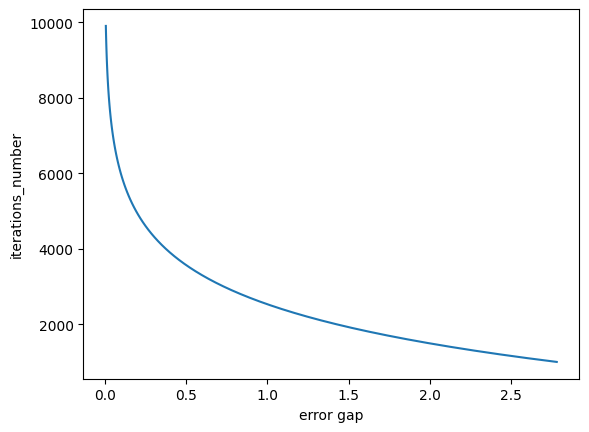

In [ ]:
w_real = w

iters = np.arange(1000, 10_000, 100)
gaps = []

for iter in tqdm(iters):
    w = Linreg_sol_via_GD(X_scaled, y, lr=0.1, iter_number= iter)
    gaps.append(np.linalg.norm(w_real - w))

plt.plot(gaps, iters)
plt.ylabel("iterations_number")
plt.xlabel("error gap")
plt.show()

In the second part of the task, we will see the features dependence and try to solve it.

Calculate the the value of $\text{Cov}(X)=\frac{1}{n-1}(X-\mu)^\top (X-\mu)$? <br/>
- What can you imply from this about the features?
- Can we imply something on $X^\top X$? Must its det be 0?

Note: In your calculations, make sure the bias is not included as feature. <br/>
<font color='red'>Write your answers here and explain it</font>
<font color='red'>
1. Based on coveriance heatmap, it's noticably that some values have strong correlation and some are not. for eg, 0.24 has a strong correlation indicates dependent features and there are low correlation indicates to indpendent features.  a non-zero one implies that the matrix
$ 𝑋^𝑇X$ is  invertible, indicating that the features do not have perfect multicollinearity.
<font color='red'>
2. The determinant of the matrix is 173411718.97092056 impling that the matrix is invertible, which is a necessary condition for solving the normal equations in linear regression.In case of $det = 0$ would indicate perfect multicollinearity. For $X^T X$ to be invertible, its determinant must not be zero.

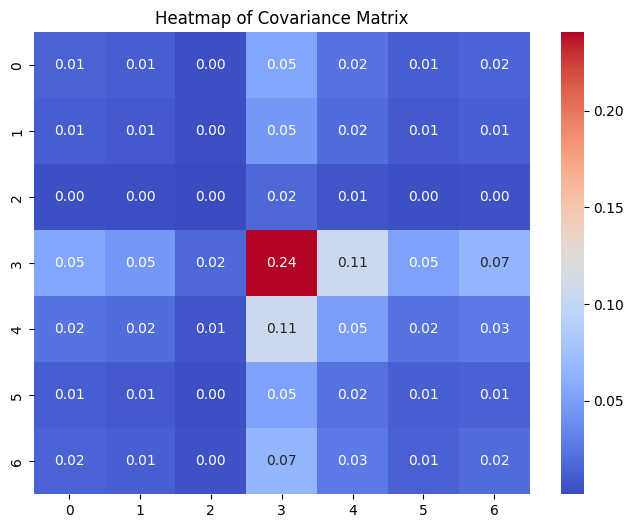

det_XTX = 173411718.97092056


In [ ]:
import seaborn as sns
# Implement here
def calculate_covariance_matrix(X):
    # Number of samples
    n = X.shape[0]
    mu = np.mean(X, axis=0)
    X_centered = X - mu

    # Calculate the covariance matrix
    cov_matrix = (1 / (n - 1)) * np.dot(X_centered.T, X_centered)

    # Calculating Determinant value
    XTX = np.dot(X.T, X)
    det_XTX = np.linalg.det(XTX)

    return cov_matrix, det_XTX


covariance_matrix, det_XTX = calculate_covariance_matrix(X)
plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap of Covariance Matrix")
plt.show()

print(f"det_XTX = {det_XTX}")

Implement the solution to ridge regression using GD.

In [ ]:
# no need for gradient descent as Sharon requested
def Linreg_sol_Ridge(X, y, lamda):
    # Number of training examples and number of features
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    n, d = X.shape
    I = np.eye(d)
    I[0, 0] = 0
    w = np.linalg.inv(np.dot(X.T , X) + lamda * I) @ X.T @ y
    return w

The following code measures the mse error as function of the regularization hyperparameter lamda. <br/>Explain the origin to the mse' behaviour as function of lamda in this problem. <br/>
<font color='red'>Write your answer here and explain it</font>

<font color='red'>
Depending on the value of $\lambda$ : </br>
1. Case $\lambda$ value is small, it would result Low bias, high variance, potentially low training MSE but high validation/test MSE (overfitting). </br>
<font color='red'>
2. Case $\lambda$ value is Moderate, Balanced bias-variance tradeoff, optimal validation/test MSE. </br>
<font color='red'>
3. Case $\lambda$ value is Large, High bias, low variance, higher training and validation/test MSE (underfitting). </br>
Moderate
<font color='red'>
The behavior of MSE as a function of $\lambda$ follows a U-shaped curve: initially decreasing as regularization prevents overfitting, reaching a minimum, and then increasing as the model becomes too simple and underfits the data.

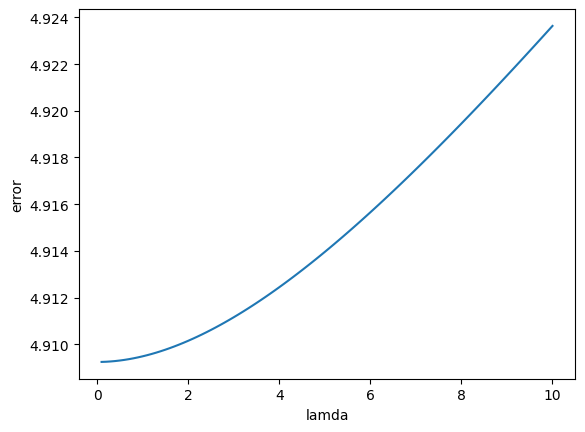

In [ ]:
mses = []
lamdas = np.arange(0.1, 10.1, 0.1)
X_for_reg = X_scaled
for lamda in lamdas:

    w = Linreg_sol_Ridge(X_for_reg, y, lamda)

    preds = np.dot(np.hstack([np.ones((X_for_reg.shape[0], 1)), X_for_reg]), w)
    mses.append(np.mean((preds - y) ** 2))

plt.plot(lamdas, mses)
plt.ylabel("error")
plt.xlabel("lamda")
plt.show()

## Question 3 - Decision tree

Recall the wine dataset from hw1, where we classified wine types based on their physical and chemical properties. You will do it, but this time with decision trees!

In [ ]:
# Import libraries

import numpy as np
import pandas as pd

In [ ]:
# Load the data, print the first rows

data = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw1/wine.data.csv')
data.head(3)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1


Complete this missing implementation of the following functions:
- ```calculate_entropy(self, data)``` – given data, compute the entropy, where the distribution is over its labels (target class).
- ```calculate_information_gain(self, data, feature)``` – given data and specific feature, compute the information gain given by selecting that feature.

Algorithm: The data is continuous, so create 10 thresholds between the min and max values of that feature. For each threshold, split to left tree and right tree and calculate the gain. Choose the threshold which gives the highest gain, along with the gain itself (to later compare between features) <br/>

Tip: To split the tree (represented by data df), use filter_data.
For example, when calculating the gain of 'skew' with threshold 0.5, you can create the left tree by use ```filter_data(data, 'skew', '0.5', left=True)``` to obtain only those samples.

In [ ]:
class DecisionTree:
    def __init__(self, max_depth=np.inf):
        self.tree = {}
        self.max_depth = max_depth

    def calculate_entropy(self, data):
        labels = data.iloc[:, -1]
        label_counts = labels.value_counts()
        probabilities = label_counts / len(labels)
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy

    def calculate_information_gain(self, data, feature):
        total_entropy = self.calculate_entropy(data)
        information_gain = total_entropy

        feature_values = data[feature]
        min_value, max_value = feature_values.min(), feature_values.max()
        thresholds = np.linspace(min_value, max_value, 10)
        values = thresholds

        best_threshold = None
        best_gain = 0
        for value in values:
            left_split = self.filter_data(data, feature, value, left=True)
            right_split = self.filter_data(data, feature, value, left=False)

            if len(left_split) == 0 or len(right_split) == 0:
                continue

            left_entropy = self.calculate_entropy(left_split)
            right_entropy = self.calculate_entropy(right_split)

            weighted_entropy = (len(left_split) / len(data)) * left_entropy + (len(right_split) / len(data)) * right_entropy
            gain = total_entropy - weighted_entropy

            if gain > best_gain:
                best_gain = gain
                best_threshold = value
        return best_gain, best_threshold

    def filter_data(self, data, feature, value, left=True):
        if left:
            return data[data[feature] <= value].drop(feature, axis=1)
        else:
            return data[data[feature] > value].drop(feature, axis=1)

    def create_tree(self, data, depth=0):


        labels = data.iloc[:, -1]  # Extract the target labels

        if len(np.unique(labels)) == 1 or depth >= self.max_depth:
            unique_labels, label_counts = np.unique(labels, return_counts=True)
            majority_label = unique_labels[label_counts.argmax()]
            return majority_label

        features = data.columns.tolist()[:-1]
        if len(features) == 0:
            unique_labels, label_counts = np.unique(labels, return_counts=True)
            majority_label = unique_labels[label_counts.argmax()]
            return majority_label

        selected_feature = None
        best_gain = 0
        best_threshold = None

        for feature in features:
            gain, threshold = self.calculate_information_gain(data, feature)
            if gain >= best_gain:
                selected_feature = feature
                best_threshold = threshold
                best_gain = gain

        tree_node = {}
        left_split = self.filter_data(data, selected_feature, best_threshold, left=True)
        right_split = self.filter_data(data, selected_feature, best_threshold, left=False)

        if len(left_split) == 0 or len(right_split) == 0:
            unique_labels, label_counts = np.unique(labels, return_counts=True)
            majority_label = unique_labels[label_counts.argmax()]
            return majority_label



        tree_node[(selected_feature, f"<={best_threshold}")] = self.create_tree(left_split, depth+1)
        tree_node[(selected_feature, f">{best_threshold}")] = self.create_tree(right_split, depth+1)

        if not isinstance(tree_node[(selected_feature, f"<={best_threshold}")], dict) and \
                not isinstance(tree_node[(selected_feature, f">{best_threshold}")], dict):
            if tree_node[(selected_feature, f"<={best_threshold}")] == tree_node[(selected_feature, f">{best_threshold}")]:
                return tree_node[(selected_feature, f"<={best_threshold}")]

        return tree_node

    def fit(self, data):
        self.tree = self.create_tree(data)

    def predict(self, X):
        X = [row[1] for row in X.iterrows()]

        predictions = []

        for row in X:
            current_node = self.tree
            while isinstance(current_node, dict):
                split_condition = next(iter(current_node))
                feature, value = split_condition
                threshold = float(value[2:])
                if row[feature] <= threshold:
                    current_node = current_node[feature, f"<={threshold}"]
                else:
                    current_node = current_node[feature, f">{threshold}"]
            predictions.append(current_node)

        return predictions

    def _plot(self, tree, indent=0):
        depth = 1
        if not isinstance(tree, dict):
            print(" " * indent + str(tree))
            return depth

        for key, value in tree.items():
            print(" " * indent + str(key) + ":")
            if isinstance(value, dict):
                depth = max(depth, 1 + self._plot(value, indent + 2))
            else:
                print(" " * (indent + 2) + str(value))
        return depth

    def plot(self):
        depth = self._plot(self.tree, 0)
        print(f'depth is {depth}')


You are ready - define DecisionTree, fit it on the entire data and plot the tree. <br/>
The depth of the tree should be 5

In [ ]:
# Implement here
# Initialize the DecisionTree
tree = DecisionTree()
# Fit the DecisionTree
tree.fit(data)

# Plot the tree
tree.plot()

('Flavanoids', '<=1.3933333333333335'):
  ('Color intensity', '<=4.405555555555556'):
    ('Hue', '<=0.9022222222222223'):
      ('Proline', '<=372.0'):
        2
      ('Proline', '>372.0'):
        3
    ('Hue', '>0.9022222222222223'):
      ('Malic acid', '<=3.167777777777778'):
        2
      ('Malic acid', '>3.167777777777778'):
        3
  ('Color intensity', '>4.405555555555556'):
    3
('Flavanoids', '>1.3933333333333335'):
  ('Proline', '<=745.3333333333333'):
    ('Alcohol', '<=13.231111111111112'):
      2
    ('Alcohol', '>13.231111111111112'):
      ('Color intensity', '<=3.96'):
        2
      ('Color intensity', '>3.96'):
        ('OD280/OD315 of diluted wines', '<=1.3'):
          3
        ('OD280/OD315 of diluted wines', '>1.3'):
          1
  ('Proline', '>745.3333333333333'):
    ('Alcohol', '<=12.597777777777779'):
      2
    ('Alcohol', '>12.597777777777779'):
      ('Color intensity', '<=3.35'):
        2
      ('Color intensity', '>3.35'):
        1
depth is 

The decision tree is pretty large (depth is 5). To solve this, lets modify our DecisionTree: <br/>
```
def __init__(self, max_depth=np.inf):
        self.tree = {}
        self.max_depth = max_depth
```

Modify the rest of the code to stop growing after max_depth. <br/>
Hint: When reached to max_depth, should we continue splitting? Which category will be best to be selected?


Using 10 thresholds, compare using max_depth=2 and max_depth=4. Based on the results, which depth is better for our problem in term of ML? <br/>
<font color='red'>Write your answer here and explain it</font>

<font color='red'>Based on the results:
max_depth=2: Training Accuracy = 0.9225352112676056, Test Accuracy = 0.8888888888888888

max_depth=4: Training Accuracy = 0.9859154929577465, Test Accuracy = 0.8888888888888888 we see that in max depth = 4 we get higher training accuracy than max_depth = 2 but we get the same test accuracy so the obvious choice would be to go with max_depth = 2 because in doing so we make the model simpler and we get reduced complexity for the same test accuracy
and also we reduce the chances of overfitting the data so we can handle new data better. </font>

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Initialize a list to store results
results = []

# Loop over each depth
for depth in [2, 4]:
    print(f"------------ max_depth={depth} ------------")

    # Initialize DecisionTree with current max_depth
    tree = DecisionTree(max_depth=depth)

    # Fit the DecisionTree on training data
    tree.fit(train)

    # Calculate training accuracy
    train_predictions = tree.predict(train)
    train_accuracy = np.mean(train_predictions == train.iloc[:, -1])
    print(f'Training accuracy is {train_accuracy}')

    # Calculate test accuracy
    test_predictions = tree.predict(test)
    test_accuracy = np.mean(test_predictions == test.iloc[:, -1])
    print(f'Test accuracy is {test_accuracy}')

    # Store results
    results.append((depth, train_accuracy, test_accuracy))
    print()

# Print the results for comparison
print("Summary of Results:")
for depth, train_acc, test_acc in results:
    print(f"max_depth={depth}: Training Accuracy = {train_acc}, Test Accuracy = {test_acc}")

------------ max_depth=2 ------------


TypeError: 'numpy.int64' object is not callable

Now, use KFold (as seen in tutorials) for a cross validation search to the best depth for the tree.

In [ ]:
from sklearn.model_selection import KFold
from tqdm import tqdm
import matplotlib.pyplot as plt

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accs = []

# Iterate over different depths
for depth in tqdm(range(1, 6)):
    fold_accs = []

    # Iterate over each fold
    for train_index, val_index in kf.split(data):
        train_data, val_data = data.iloc[train_index], data.iloc[val_index]

        # Initialize DecisionTree with current max_depth
        tree = DecisionTree(max_depth=depth)

        # Fit the DecisionTree on training data
        tree.fit(train_data)

        # Predict on validation data
        val_predictions = tree.predict(val_data)

        # Calculate accuracy for this fold
        val_accuracy = np.mean(val_predictions == val_data.iloc[:, -1])
        fold_accs.append(val_accuracy)

    # Compute average accuracy across all folds for this depth
    avg_acc = np.mean(fold_accs)
    accs.append(avg_acc)

# Plotting the results
plt.plot(range(1, 6), accs, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Average Accuracy')
plt.title('Cross Validation Results')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()


Use that depth and print the test score. Is it better generalizer than the first one? What do you conclude about the tuning proccess using validation? (answer to yourselves).

## Question 4 - PAC, Bias vs Variance
See attached pdf in moodle assignment!

## Question 5 - Polynomial regression - 5 pts bonus
In this problem you will extend regression to fit nonlinear functions.<br/>
The dataset contains one feature (x) and continiuos prediction (y).

In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#@title Load data

import requests
from io import BytesIO

def load_npy_file(url):
  response = requests.get(url)
  if response.status_code == 200:
    npy_data = np.load(BytesIO(response.content), allow_pickle=True).item()
    return npy_data
  else:
    return None

In [ ]:
data_dict = load_npy_file('https://sharon.srworkspace.com/ml/datasets/hw3/linreg_data_2d.npy')

x_train = data_dict['x_train']
y_train = data_dict['y_train']
x_test = data_dict['x_test']
y_test = data_dict['y_test']

Look at the plot of the training data. What do you think was the function generated the data? <br/>
<font color='red'>Write your answer here</font>
<font color='red'>
The data suggests a combination of polynomial terms. Given the shape, it could be generated by a polynomial function, judging by the generated plot possibly of a higher degree.
</font>

In [ ]:
plt.scatter(x_train, y_train, color='blue', s=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Train')
plt.show()

We will assume the polynomial regression problem of the following form:
$$ y=a_0+a_1x+a_2x^2+...+a_dx^d $$
The function ```get_solution``` will find the cofficients, similarly to methods done in simple linear regression. <br/>
The function ```calc``` will recieve a new sample and the cofficients found, and will predict the output.





In [ ]:
# https://www.youtube.com/watch?v=H8kocPOT5v0 Great Youtube Guide on Polynomial regression, highly recommended watching it

# Debugging: print the shapes of x_train and y_train
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

def get_solution(X, y, degree=2):
    # Implement here
    X = np.ravel(X)
    y = np.ravel(y)
    coefs = np.polyfit(X, y, degree)
    return coefs

def calc(x, coefs):
    # Implement here
    y_pred = np.polyval(coefs, x)
    return y_pred


Running the current code with $d=1$ yields a simple regressor.
- Which $d$ works best?
- According to your previous answer, which $d$ <u>is expected</u> to work the best?
- Try to explain what happens when you try $d+1$ and why? Was the solver you implemented enough?

<font color='red'>Write your answers here and explain them</font>
<font color='red'>
1. i think it is $d=6$ or $d = 8$, and it fits the shape of the plot better than other $d$ values.
<font color='red'>
2. after comparison between different $d$ values, the higher the $d$ value the more it would fit the data and that works only from $0 < d \leq 8 $. where at $d=8$ it reaches it's best data fit.
<font color='red'>
3. Despite that the higher $d$ value the more data fit. But, for a large samples data, it would cause overfitting. in this question, it suits perfectly for having only 150 samples for each train and test data. To prevent that from happening, Ridge or Lasso must be used for higher performance and efficiency.

In [ ]:
xx = np.arange(0, 100, 0.1)
yy = []

weights = get_solution(x_train, y_train, 6)

for samp in xx:
  yy.append(calc(samp, weights))

plt.scatter(x_train, y_train, color='blue', s=2, label='train')
plt.scatter(x_test, y_test, color='red', s=2, label='test')
plt.plot(xx, yy, color='black')
plt.show()